In [ ]:
!pip install dowhy
!pip install econml

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy
import dowhy.plotter
from dowhy import CausalModel

In [ ]:
df = pd.read_csv('causal_practice.csv')

In [ ]:
df.head()

,Treatment,Outcome,w0,s,w1
0,20.397085,41.830518,-3.922260,6.721181,-2.399719
1,21.708782,43.264087,-3.933155,7.258544,0.326249
2,15.255727,30.567017,3.078333,2.039965,-1.053156
3,14.713131,29.121849,2.872575,9.621560,0.184363
4,12.953274,26.366410,-2.765531,8.111067,-1.813641


In [ ]:
df.shape

(10000, 5)

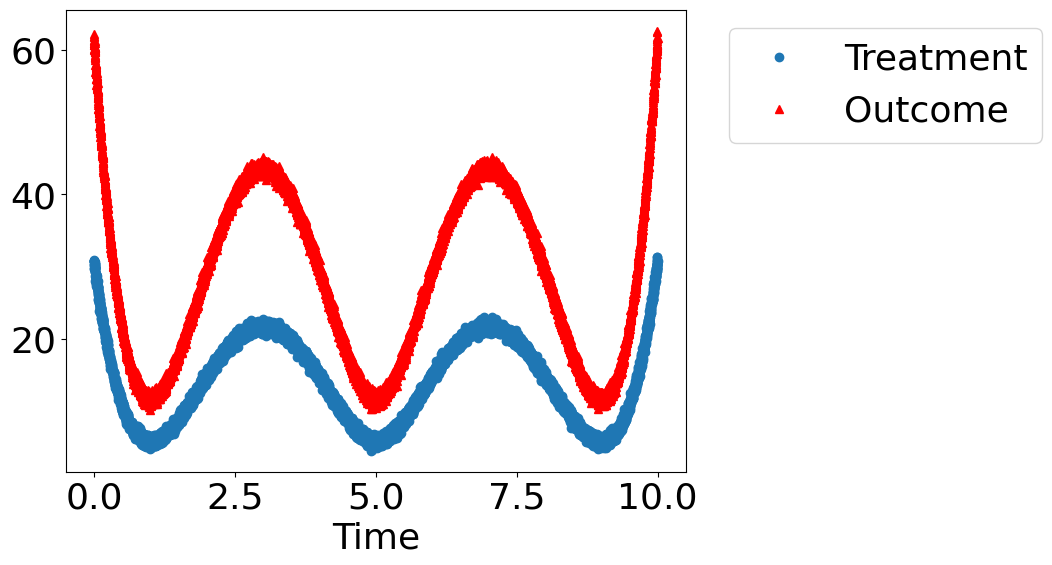

In [ ]:
dowhy.plotter.plot_treatment_outcome(df['Treatment'], df['Outcome'], df['s'])

##Model assumptions about the data-generating process using a causal graph

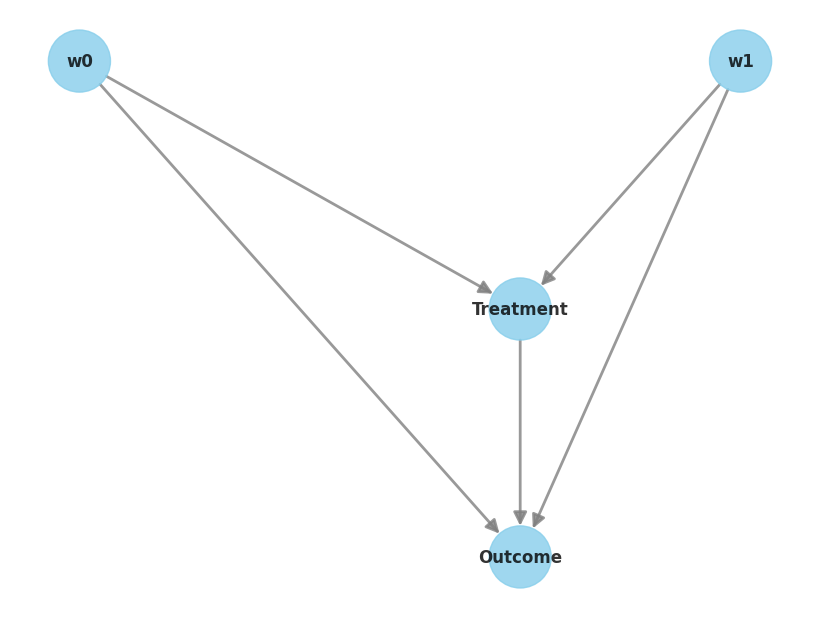

In [ ]:
model= CausalModel(
        data=df,
        treatment='Treatment',
        outcome='Outcome',
        common_causes= ['w0','w1'])
model.view_model(layout="dot")

##Identify the correct estimand for the target quantity based on the causal model

In [ ]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



##Estimate the target estimand

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0
Target units: ate

## Estimate
Mean value: 1.9991713875302797

Causal Estimate is 1.9991713875302797


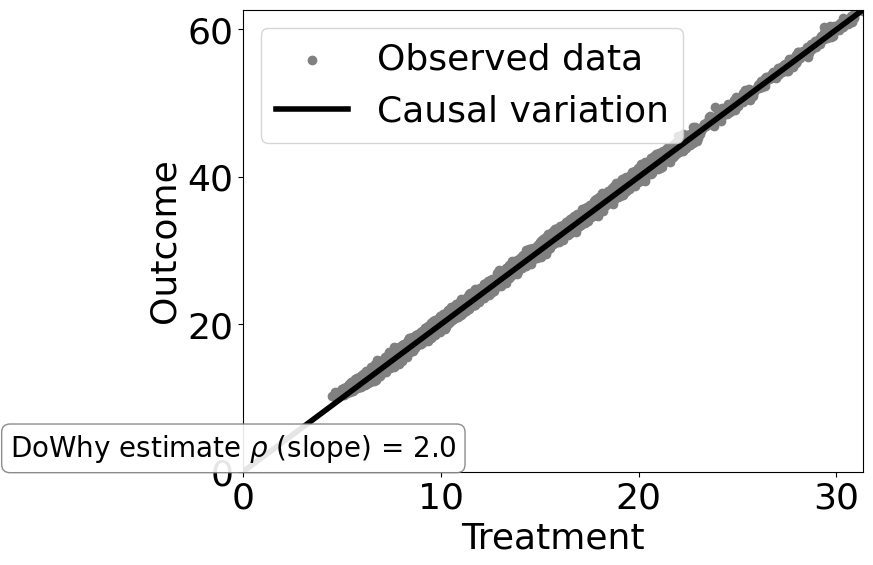

In [ ]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between action and outcome = causal effect
dowhy.plotter.plot_causal_effect(estimate, df['Treatment'], df['Outcome'])

##Using EconML

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
import econml
dml_estimate = model.estimate_effect(identified_estimand, method_name="backdoor.econml.dml.DML",
                                     control_value = 0,
                                     treatment_value = 1,
                                 confidence_intervals=False,
                                method_params={"init_params":{'model_y':GradientBoostingRegressor(),
                                                              'model_t': GradientBoostingRegressor(),
                                                              "model_final":LassoCV(fit_intercept=False),
                                                              'featurizer':PolynomialFeatures(degree=2, include_bias=True)},
                                               "fit_params":{}})
print(dml_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                        
────────────(E[Outcome|w1,w0])
d[Treatment]                  
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w1,w0,U) = P(Outcome|Treatment,w1,w0)

## Realized estimand
b: Outcome~Treatment+w1+w0 | 
Target units: ate

## Estimate
Mean value: 1.0048915103421754
Effect estimates: [[1.00489151]]



##Adding a random common cause variable

In [ ]:
res_random=model.refute_estimate(identified_estimand, dml_estimate, method_name="random_common_cause")
print(res_random)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

Refute: Add a random common cause
Estimated effect:1.0048915103421754
New effect:1.0162818757913288
p value:0.5800000000000001



In [ ]:
res_placebo=model.refute_estimate(identified_estimand, dml_estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute",
        num_simulations=20)
print(res_placebo)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

Refute: Use a Placebo Treatment
Estimated effect:1.0048915103421754
New effect:-6.636204503746215e-05
p value:0.43447047393264127

